# Deep Network to Classify Traffic Signs

<b>Different traffic signs used in this project:</b>

-  0 = Speed limit (20km/h)
-  1 = Speed limit (30km/h)
-  2 = Speed limit (50km/h)
-  3 = Speed limit (60km/h)
-  4 = Speed limit (70km/h)
-  5 = Speed limit (80km/h)
-  6 = End of speed limit (80km/h)
-  7 = Speed limit (100km/h)
-  8 = Speed limit (120km/h)
-  9 = No passing
- 10 = No passing for vehicles over 3.5 metric tons
- 11 = Right-of-way at the next intersection
- 12 = Priority road
- 13 = Yield
- 14 = Stop
- 15 = No vehicles
- 16 = Vehicles over 3.5 metric tons prohibited
- 17 = No entry
- 18 = General caution
- 19 = Dangerous curve to the left
- 20 = Dangerous curve to the right
- 21 = Double curve
- 22 = Bumpy road
- 23 = Slippery road
- 24 = Road narrows on the right
- 25 = Road work
- 26 = Traffic signals
- 27 = Pedestrians
- 28 = Children crossing
- 29 = Bicycles crossing
- 30 = Beware of ice/snow
- 31 = Wild animals crossing
- 32 = End of all speed and passing limits
- 33 = Turn right ahead
- 34 = Turn left ahead
- 35 = Ahead only
- 36 = Go straight or right
- 37 = Go straight or left
- 38 = Keep right
- 39 = Keep left
- 40 = Roundabout mandatory
- 41 = End of no passing
- 42 = End of no passing by vehicles over 3.5 metric tons

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Libraries 
import pickle
import pandas as pd             # Import Pandas for data manipulation using dataframes
import numpy as np              # Import Numpy for statistical analysis 
import matplotlib.pyplot as plt # Import MatPlotLib for data visualisation
import random

## Import Dataset

In [3]:
with open("./Traffic_Signs_Data/Train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./Traffic_Signs_Data/Validate.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./Traffic_Signs_Data/Test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [5]:
x_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

## Visualize Random Image from the Dataset

36

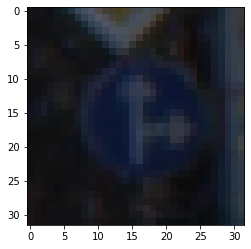

In [7]:
i = 1000
plt.imshow(x_train[i])
y_train[i]

## Data Preparation

In [8]:
# Shuffle the Dataset 
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)
x_train.shape

(34799, 32, 32, 3)

In [9]:
# Convert to Grayscale
x_train_gray = np.sum(x_train/3, axis=3, keepdims=True)
x_test_gray  = np.sum(x_test/3, axis=3, keepdims=True)
x_validation_gray  = np.sum(x_validation/3, axis=3, keepdims=True)
x_train_gray.shape

(34799, 32, 32, 1)

In [10]:
# Normalize the Dataset
x_train_gray_norm = (x_train_gray - 128)/128 
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

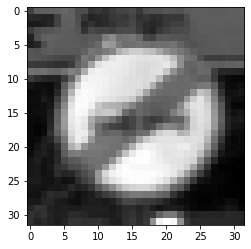

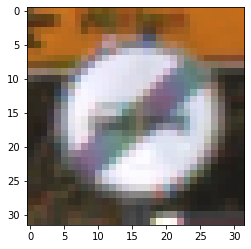

In [11]:
i = 610
plt.imshow(x_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train[i])

## Create the Model

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [13]:
image_shape = x_train_gray[i].shape

In [14]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 43, activation = 'sigmoid'))

W0720 15:57:37.712914  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 15:57:37.724887  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 15:57:37.726876  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 15:57:37.737875  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



## Compile the Model

In [15]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

W0720 15:57:37.778761  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0720 15:57:37.782755  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



## Train the Model

In [16]:
history = cnn_model.fit(x_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=50,
                        verbose=1,
                        validation_data = (x_validation_gray_norm,y_validation))

W0720 15:57:37.889473  6396 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0720 15:57:37.910385  6396 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 4s 107us/step - loss: 3.2431 - acc: 0.0843 - val_loss: 3.0520 - val_acc: 0.1175
Epoch 2/50
34799/34799 [==============================] - 1s 24us/step - loss: 1.9385 - acc: 0.4776 - val_loss: 1.8824 - val_acc: 0.4830
Epoch 3/50
34799/34799 [==============================] - 1s 24us/step - loss: 1.2150 - acc: 0.6956 - val_loss: 1.4249 - val_acc: 0.5975
Epoch 4/50
34799/34799 [==============================] - 1s 24us/step - loss: 0.9146 - acc: 0.7756 - val_loss: 1.2363 - val_acc: 0.6703
Epoch 5/50
34799/34799 [==============================] - 1s 24us/step - loss: 0.7293 - acc: 0.8259 - val_loss: 1.0810 - val_acc: 0.7082
Epoch 6/50
34799/34799 [==============================] - 1s 24us/step - loss: 0.6178 - acc: 0.8520 - val_loss: 0.9711 - val_acc: 0.7336
Epoch 7/50
34799/34799 [==============================] - 1s 24us/step - loss: 0.5224 - acc: 0.8841 - val_loss: 0.9001 - val_acc

## Evaluate the Model

In [17]:
score = cnn_model.evaluate(x_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8724


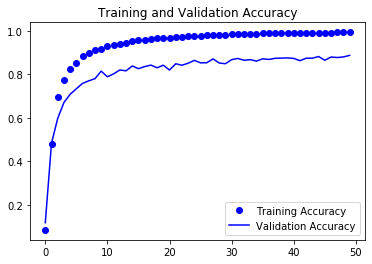

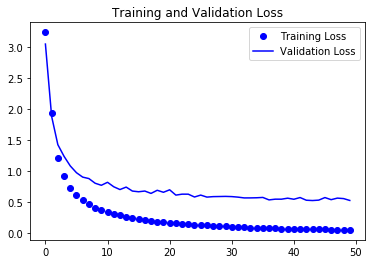

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [19]:
# Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
# Get the indices to be plotted
y_true = y_test

array([[ 29,  21,   0, ...,   1,   0,   0],
       [  3, 683,  10, ...,   0,   0,   0],
       [  1,  60, 654, ...,   8,   0,   0],
       ...,
       [  0,   3,   0, ...,  66,   0,   0],
       [  0,   0,   0, ...,   0,  41,   0],
       [  0,   0,   0, ...,   0,   5,  79]], dtype=int64)

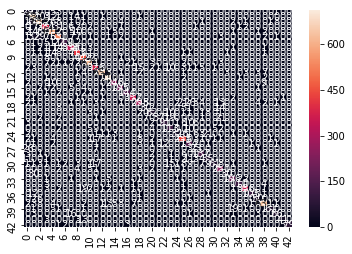

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
sns.heatmap(cm, annot=True, fmt="d")
cm # Diagonal elements represent the correct classification

## View the Results of Prediction

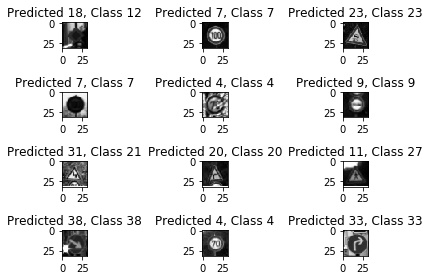

In [21]:
for i in range(0,12):
    plt.subplot(4,3,i+1)
    plt.imshow(x_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()